<a href="https://colab.research.google.com/github/joker0315/gnbai20201/blob/master/lab1/sunghyunchoi/gnbailab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

In [2]:
a=np.array([[2,0],[0,2]])
b=np.array([[4,1],[2,2]])
print(a)
print(b)


[[2 0]
 [0 2]]
[[4 1]
 [2 2]]


In [3]:
c=np.matmul(a,b)
d=np.transpose(c)
e=np.linalg.inv(d)
print(c)
print(d)
print(e)


[[8 2]
 [4 4]]
[[8 4]
 [2 4]]
[[ 0.16666667 -0.16666667]
 [-0.08333333  0.33333333]]


shape of x : (100,)
shape of y : (100,)


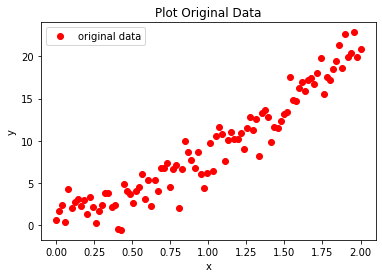

shape of x (100, 2)
shape of y (100, 1)
[[1.         0.        ]
 [1.         0.02020202]
 [1.         0.04040404]
 [1.         0.06060606]
 [1.         0.08080808]
 [1.         0.1010101 ]
 [1.         0.12121212]
 [1.         0.14141414]
 [1.         0.16161616]
 [1.         0.18181818]]
[[0.68578517]
 [1.67173466]
 [2.40627588]
 [0.3751675 ]
 [4.35594913]
 [2.10969915]
 [2.79043498]
 [3.10140969]
 [2.27021292]
 [3.04895187]]
time : 11.086292028427124
[[-0.94710665]
 [10.23574237]]
time : 0.29718780517578125
[[0.11469349]
 [9.41869088]]
time : 0.00026607513427734375
[[-0.94710665]
 [10.23574237]]


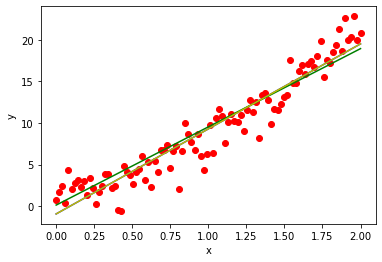

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
# pandas를 통해 txt 파일 읽어오기
name_file = './data_lab1.txt'
columns = ['x', 'y']

data_in = pd.read_csv(name_file, names=columns, sep=' ')

# pandas dataframe으로부터 numpy 행렬로 바꾸기
x = np.asarray(data_in['x'])
y = np.asarray(data_in['y'])

print("shape of x :", x.shape)
print("shape of y :", y.shape)

plt.plot(x, y, 'ro', label='original data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot Original Data')
plt.legend()
plt.show()

# x에 x0=1에 해당하는 열을 추가하여 x를 reshape하기
# 정상적으로 코딩했다면 x의 shape는 (100,)에서 (100, 2)가 되어야함
x = np.column_stack((np.ones_like(x), x))
print('shape of x', x.shape)

# 현재 1차원 배열 y를 열벡터로 reshape하기
# 정상적으로 코딩했다면 x의 shape는 (100,)에서 (100, 1)이 되어야함
y = y.reshape(-1, 1)
print('shape of y', y.shape)

# x의 첫 10개의 데이터 출력해보기
print(x[:10])

# y의 첫 10개의 데이터 출력해보기
print(y[:10])

I = x.shape[0]
N = x.shape[1] - 1
alpha = 0.001
max_epoch = 10000

# 타이머 시작
start = time.time()

# 파라미터 랜덤 초기화
theta_BGD = np.random.rand(N+1, 1)

# 메인 루프
for epoch in range(max_epoch):
    # n 루프를 도는 중에 변경된 theta값을 사용하면 안되므로, 미리 값을 저장하여 사용합니다.
    theta_BGD_tp = np.transpose(theta_BGD)
    for n in range(0, N+1):
        gradient = 0.
        for i in range(0, I):
            gradient += (np.matmul(theta_BGD_tp, x[i]) - y[i]) * x[i][n]
        theta_BGD[n] = theta_BGD[n] - alpha * gradient

# 학습에 소요된 시간 출력
print('time :', time.time() - start)

# 학습된 파라미터 출력
print(theta_BGD)

# 타이머 시작
start = time.time()

# 파라미터 랜덤 초기화
theta_SGD = np.random.rand(N+1, 1)
# 메인 루프
for epoch in range(max_epoch):
    # n 루프를 도는 중에 변경된 theta값을 사용하면 안되므로, 미리 값을 저장하여 사용합니다.
    theta_SGD_tp = np.transpose(theta_SGD)
    for n in range(0, N+1):
        i = np.random.randint(0, I);
        gradient = (np.matmul(theta_SGD_tp, x[i]) - y[i]) * x[i][n]
        theta_SGD[n] = theta_SGD[n] - alpha * gradient
# 학습에 소요된 시간 출력
print('time :', time.time() - start)
# 학습된 파라미터 출력
print(theta_SGD)



# 타이머 시작
start = time.time()

# 공식으로 파라미터 계산
theta_OLS =np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)),np.matmul(np.transpose(x),y))

# 계산에 소요된 시간 출력
print('time :', time.time() - start)

# 파라미터 출력
print(theta_BGD3)

# plt를 통해 원본 데이터와 3개의 회귀자 plot 하기
# 그래프 상에 원본 데이터의 산점도와 직선 3개가 그려져있어야함


y1=theta_BGD[0]+theta_BGD[1]*x[:,1]
y2=theta_SGD[0]+theta_SGD[1]*x[:,1]
y3=theta_OLS[0]+theta_OLS[1]*x[:,1]


plt.plot(x[:,1], y, 'ro' ,x[:,1], y1, 'b',x[:,1], y2, 'g',x[:,1], y3, 'y')

plt.xlabel('x')
plt.ylabel('y')
plt.show()